# Predictive modeling pipeline: working with numerical data


## First model with scikit-learn
We will learn about:
* The scikit-learn API: `.fit(X, y)`/`.predict(X)`/`.score(X, y)`
* how to evaluate generalization performance of a model with train-test split

BREAK UNTILL 14:10

In [12]:
import pandas as pd
adult_census = pd.read_csv('datasets/adult-census-numeric.csv')

In [13]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [14]:
list_of_Strings = ['class', 'age']
adult_census[list_of_Strings]

,class,age
0,<=50K,41
1,<=50K,48
2,<=50K,60
3,<=50K,37
4,<=50K,73
...,...,...
39068,<=50K,45
39069,<=50K,47
39070,>50K,29
39071,<=50K,29


In [15]:
target_name = "class"
target = adult_census[target_name]
target.head(2)

0     <=50K
1     <=50K
Name: class, dtype: object

In [16]:
data = adult_census.drop(columns=[target_name])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [17]:
data.shape

(39073, 4)

In [18]:
data.shape # attribute\
data.head() # method --> function attached to a class

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


### Fit our first model
K-nearest neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [21]:
model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

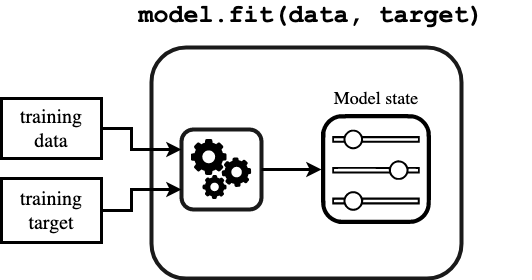

In [22]:
target_predicted = model.predict(data)

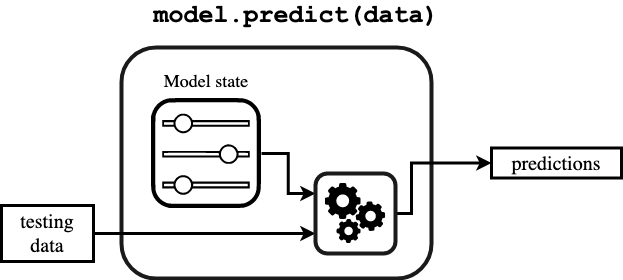

In [23]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [24]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [25]:
(target == target_predicted).mean()

0.8219486602001382

### Train-test split

In [26]:
adult_census_test = pd.read_csv('datasets/adult-census-numeric-test.csv')

In [27]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

In [28]:
data_test.shape

(9769, 4)

In [29]:
accuracy = model.score(data_test, target_test)

In [30]:
accuracy

0.80202681953117

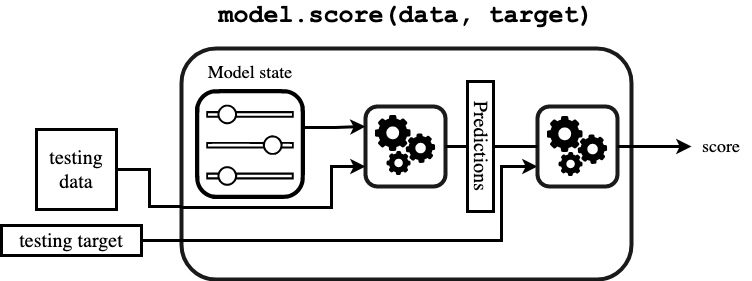

### 📝 Exercise: Adapting your first model
The goal of this exercise is to fit a similar model as we just did to get familiar with manipulating scikit-learn objects and in particular the `.fit/.predict/.score` API.

Before we used `model = KNeighborsClassifier()`. All scikit-learn models can be created without arguments. This is convenient because it means that you don’t need to understand the full details of a model before starting to use it.

One of the KNeighborsClassifier parameters is n_neighbors. It controls the number of neighbors we are going to use to make a prediction for a new data point.

#### 1. What is the default value of the n_neighbors parameter? 
Hint: Look at the documentation on the scikit-learn website or directly access the description inside your notebook by running the following cell. This will open a pager pointing to the documentation.
```python
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier?
```

#### 2. Create a KNeighborsClassifier model with n_neighbors=50
1. Fit this model on the data and target loaded above
2. Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?
3. Compute the accuracy on the training data.
4. Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.

In [31]:
# BREAK UNTILL 15:10

### Working with numerical data
- identifying numerical data in a heterogeneous dataset;

- selecting the subset of columns corresponding to numerical data;

- using a scikit-learn helper to separate data into train-test sets;

- training and evaluating a more complex scikit-learn model.

In [32]:
adult_census = pd.read_csv('datasets/adult-census.csv')

In [33]:
adult_census = adult_census.drop(columns="education-num")

In [34]:
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
data, target = adult_census.drop(columns="class"), adult_census["class"] # same but in one line
data = adult_census.drop(columns="class")
target = adult_census["class"]

In [36]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [37]:
numerical_columns = ["age", 'capital-gain', "capital-loss", "hours-per-week"]
data_numeric = data[numerical_columns]

#### Making a train-test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

In [40]:
data_test.shape

(12211, 4)

In [41]:
data_train.shape

(36631, 4)

#### Train a LogisticRegression model
0.1 * age + 3.3 * hours-per-week - 15.1 > 0 predict 'rich' if below 0 predict 'poor' 

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(data_train, target_train)

LogisticRegression()

In [44]:
model.score(data_test, target_test)

0.8070592089099992


### Exercise: Compare with simple baselines
The goal of this exercise is to compare the performance of our classifier in the previous notebook (roughly 81% accuracy with LogisticRegression) to some simple baseline classifiers. The simplest baseline classifier is one that always predicts the same class, irrespective of the input data.

What would be the score of a model that always predicts ' >50K'?

What would be the score of a model that always predicts ' <=50K'?

Is 81% or 82% accuracy a good score for this problem?

Use a DummyClassifier such that the resulting classifier will always predict the class ' >50K'. What is the accuracy score on the test set? Repeat the experiment by always predicting the class ' <=50K'.

Hint: you can set the strategy parameter of the DummyClassifier to achieve the desired behavior.

You can import DummyClassifier like this:
```python
from sklearn.dummy import DummyClassifier
```

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
clf = DummyClassifier(strategy='most_frequent')
clf.fit(data_train, target_train)
clf.score(data_test, target_test)

0.7660306281221849

In [47]:
clf.predict(data_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

### Preprocessing numerical features
We will introduce:
* An example of preprocessing: scaling numerical variables
* using a scikit-learn pipeline to chain preprocessing and model training

In [48]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(data_train)

StandardScaler()

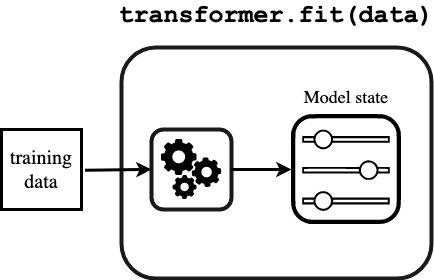

In [52]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [53]:
scaler.fit_transform(data_train)

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [54]:
from sklearn.pipeline import make_pipeline

In [55]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [56]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [57]:
model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

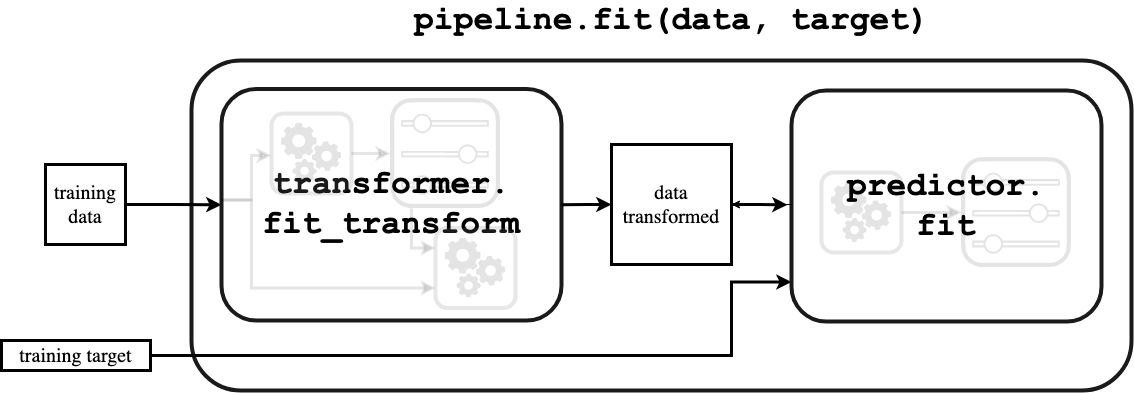

In [58]:
model.predict(data_test)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

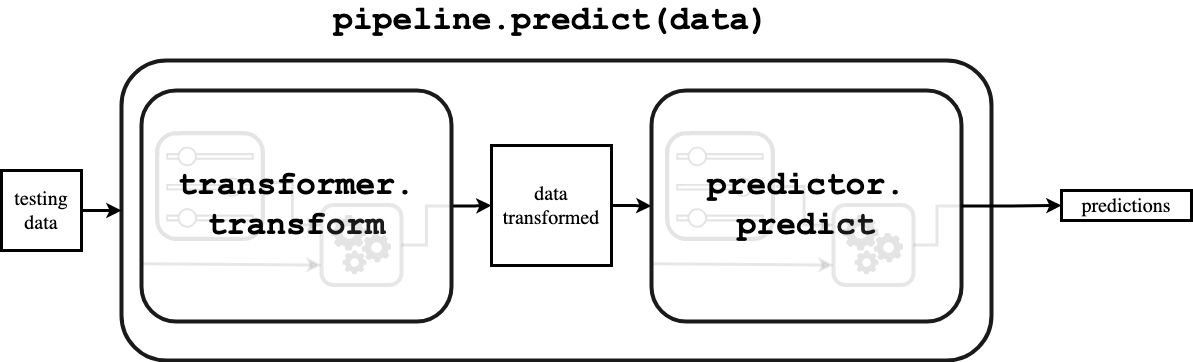

In [59]:
model.score(data_test, target_test)

0.8071411022848252

In [60]:
from sklearn.model_selection import cross_validate

In [61]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [62]:
cv_result = cross_validate(model, data_numeric, target, cv=5)

In [63]:
cv_result

{'fit_time': array([0.04746318, 0.04129982, 0.0412848 , 0.04053307, 0.04137087]),
 'score_time': array([0.00909972, 0.00910401, 0.00933242, 0.00928378, 0.00915027]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}


### Exercise: Recap fitting a scikit-learn model on numerical data
#### 1. Why do we need two sets: a train set and a test set?

- a) to train the model faster
- b) to validate the model on unseen data
- c) to improve the accuracy of the model

Select all answers that apply

#### 2. The generalization performance of a scikit-learn model can be evaluated by:

- a) calling fit to train the model on the training set, predict on the test set to get the predictions, and compute the score by passing the predictions and the true target values to some metric function
- b) calling fit to train the model on the training set and score to compute the score on the test set
- c) calling cross_validate by passing the model, the data and the target
- d) calling fit_transform on the data and then score to compute the score on the test set

Select all answers that apply

#### 3. When calling `cross_validate(estimator, X, y, cv=5)`, the following happens:

- a) X and y are internally split five times with non-overlapping test sets
- b) estimator.fit is called 5 times on the full X and y
- c) estimator.fit is called 5 times, each time on a different training set
- d) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the train sets
- e) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the test sets

Select all answers that apply

#### 4. (optional) Scaling
We define a 2-dimensional dataset represented graphically as follows:
![](https://i.imgur.com/muvSbI6.png)

Question

If we process the dataset using a StandardScaler with the default parameters, which of the following results do you expect:

![](https://i.imgur.com/t5mTlVG.png)


a) Preprocessing A
b) Preprocessing B
c) Preprocessing C
d) Preprocessing D

Select a single answer

#### 5. (optional) Cross-validation allows us to:

a) train the model faster
b) measure the generalization performance of the model
c) reach better generalization performance
d) estimate the variability of the generalization score

Select all answers that apply

## BREAK UNTILL 10:11

### Encoding of categorical variables
* ordinal encoeding & one-hot encoding

In [65]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [66]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [67]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [68]:
from sklearn.compose import make_column_selector as selector

In [69]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [70]:
data_categorical = data[categorical_columns]
data_categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
education_column = data_categorical[["education"]]

In [75]:
education_column.head(5)

,education
0,11th
1,HS-grad
2,Assoc-acdm
3,Some-college
4,Some-college


In [77]:
encoder = OrdinalEncoder().set_output(transform="pandas")
encoder.fit_transform(education_column)

,education
0,1.0
1,11.0
2,7.0
3,15.0
4,15.0
...,...
48837,7.0
48838,11.0
48839,11.0
48840,11.0


### Encoding nominal categories (without assuming any order)
Dummy encoding - one-hot encoding

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [85]:
encoder.fit_transform(education_column)

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
education_column

,education
0,11th
1,HS-grad
2,Assoc-acdm
3,Some-college
4,Some-college
...,...
48837,Assoc-acdm
48838,HS-grad
48839,HS-grad
48840,HS-grad


In [86]:
data_encoded = encoder.fit_transform(data_categorical)

In [87]:
data_encoded[:5]

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [93]:
model = make_pipeline(OneHotEncoder(handle_unknown='ignore'), LogisticRegression(max_iter=500))

In [95]:
model

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [94]:
cross_validate(model, data_categorical, target)

{'fit_time': array([0.32390714, 0.31577492, 0.29321384, 0.31414723, 0.28464985]),
 'score_time': array([0.01516271, 0.01498389, 0.01475096, 0.0155437 , 0.01511502]),
 'test_score': array([0.83222438, 0.83560242, 0.82872645, 0.83312858, 0.83456183])}

In [92]:
data_categorical['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

#### Ordinal encoding (everyone gives their answers in the collaborative doc):

- Q1: Is ordinal encoding is appropriate for marital status? For which (other) categories in the adult census would it be appropriate? Why?
- Q2: Can you think of another example of categorical data that is ordinal?
- Q3: What problem arises if we use ordinal encoding on a sizing chart with options: XS, S, M, L, XL, XXL? (HINT: explore `ordinal_encoder.categories_`)
- Q4: How could you solve this problem? (Look in documentation of OrdinalEncoder)
- Q5: Can you think of an ordinally encoded variable that would not have this issue?



In [96]:
numerical_columns

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [97]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [98]:
from sklearn.compose import ColumnTransformer

In [102]:
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

In [104]:
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", encoder, categorical_columns),
        ("standard_scaler", scaler, numerical_columns)
    ]
)

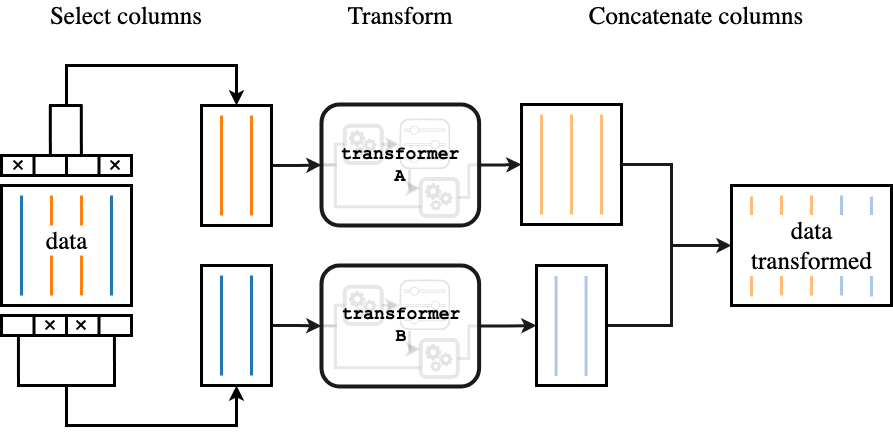

In [106]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [108]:
cv_result = cross_validate(model, data, target, cv=5)

In [111]:
cv_result['test_score'].mean(), cv_result['test_score'].std()

(0.8512550963287989, 0.002561351439896892)

In [112]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [113]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [114]:
cv_result = cross_validate(model, data, target, cv=5)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 361, in fit
    X, y = self._validate_data(X, y, dtype=[X_DTYPE], force_all_finite=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/utils/validation.py", line 845, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/svenvanderburg/miniforge3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/utils/validation.py", line 522, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
